### Instructions

- In order to run this notebook, you should have already run the cells "For dimension 2" in the notebook "Data_loader" which consists of simulating and saving realisations of the function f_n_2 defined in the file "helper_dim_2.py"

In [1]:
import numpy as np
import ot #package for optimal transport solver
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d #to plot in 3D
from helper_dim_2 import *

### Loading the data

In [2]:
# retrieving data from file. 
temp_B_array = np.loadtxt("DATA/B_dim_2.csv", delimiter=",", dtype=float) 
  
#the retried data is 1 dimensional,    
# we need to convert it to the original shape 2 dimensional shape
B_array = temp_B_array.reshape( 
    temp_B_array.shape[0], temp_B_array.shape[1] // 30, 30) #30 is insider knowledge, not great for generalization,
#it corresponds to the value n of the function f_n_2

### Visualisation of the function f_n in dimension 2

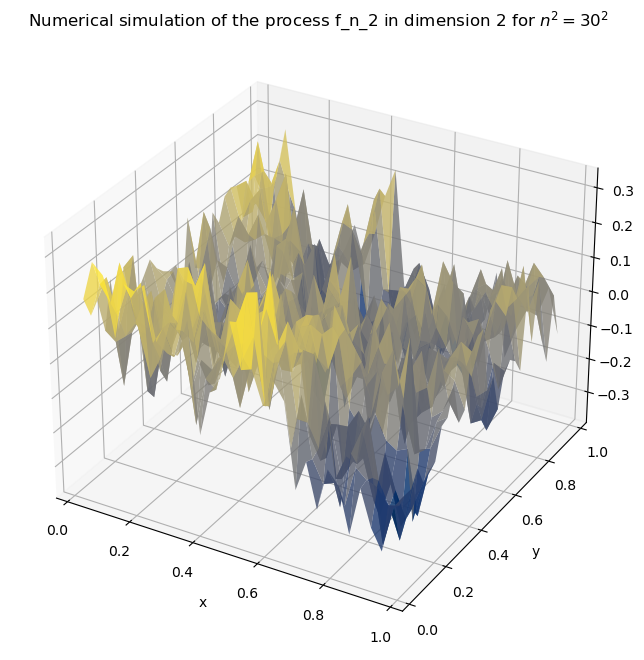

In [3]:
fig = plt.figure(figsize= (12,8))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# x and y axis

f_2, X_coord, Y_coord=f_n_2(30, 981) #keep it to get X_coord, Y_coord

X_axis=Y_coord #need to invert to fit the definition of f
Y_axis=X_coord
Z_axis=f_2
 
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap='cividis', alpha=0.8)
 
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)

ax.set_title('Numerical simulation of the process f_n_2 in dimension 2 for $n^2=30^2$')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

plt.savefig('Figures/f_n_dimension_2.png', bbox_inches=extent.expanded(1, 1.1))
 
plt.show()

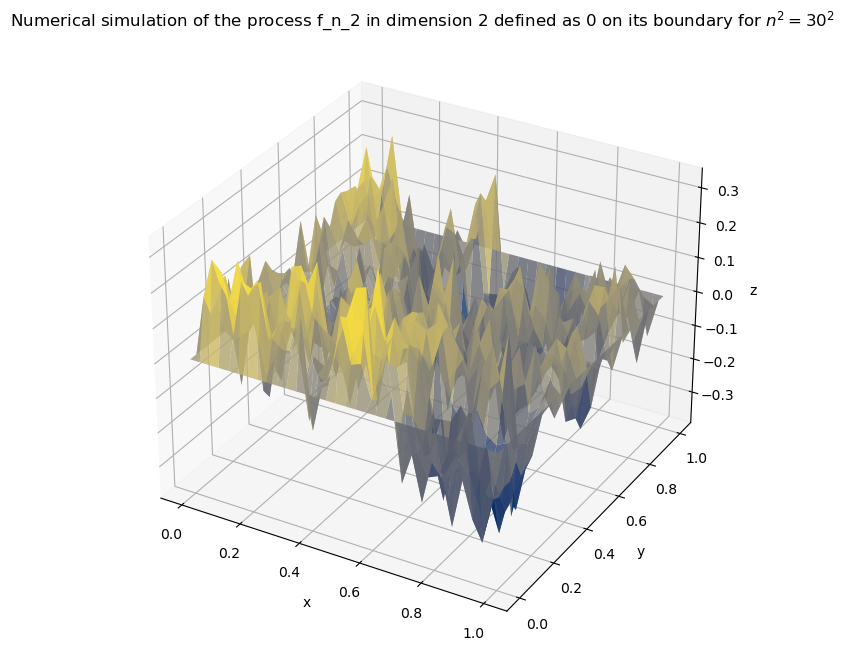

In [4]:
f_2_padded=np.pad(f_2, pad_width=1)

fig = plt.figure(figsize= (12,8))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# x and y axis
Y_axis_padded, X_axis_padded= c_padded(X_coord, Y_coord)#to investigate the behavior at the border

Z_axis_padded=f_2_padded
 
ax.plot_surface(X_axis_padded, Y_axis_padded, Z_axis_padded, cmap='cividis', alpha=0.8)
 
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)

ax.set_title('Numerical simulation of the process f_n_2 in dimension 2 defined as 0 on its boundary for $n^2=30^2$')
plt.savefig('Figures/f_n_dimension_2_0_padding.png')
 
plt.show()

### Visualisation of the mean and the variance of f_n_2(t_1,t_2) for t_1, t_2 in the grid {1/n+1,...,n/n+1} x {1/n+1,...,n/n+1}

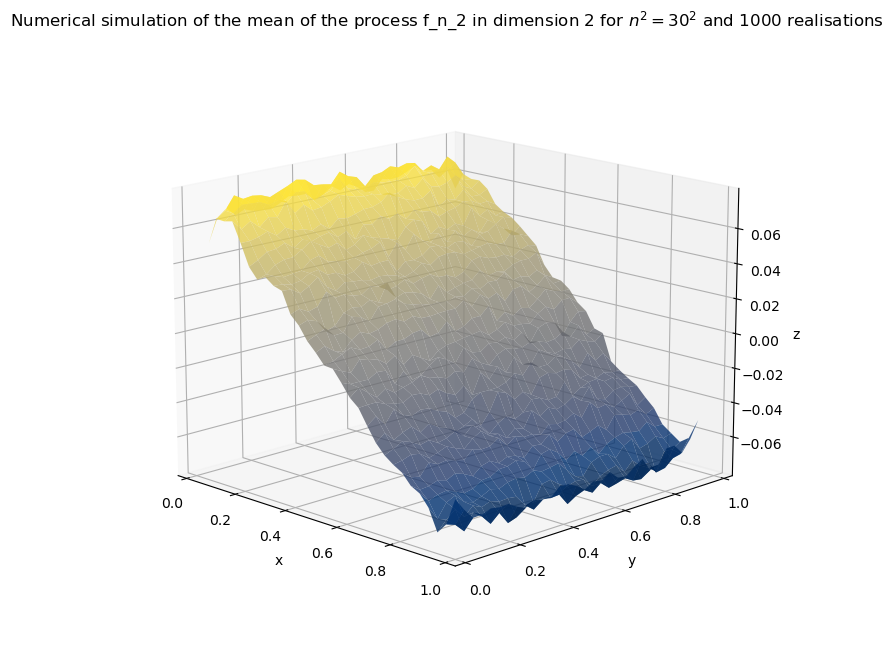

In [5]:
fig = plt.figure(figsize= (12,8))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.view_init(elev=15, azim=-45, roll=0)

# x and y axis

X_axis=Y_coord #need to invert to fit the definition of f
Y_axis=X_coord
Z_axis=np.mean(B_array, axis=0)
 
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap='cividis', alpha=0.8)
 
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)

ax.set_title('Numerical simulation of the mean of the process f_n_2 in dimension 2 for $n^2=30^2$ and 1000 realisations')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

plt.savefig('Figures/f_n_dimension_2_mean.png', bbox_inches=extent.expanded(1, 1.1))

plt.show()

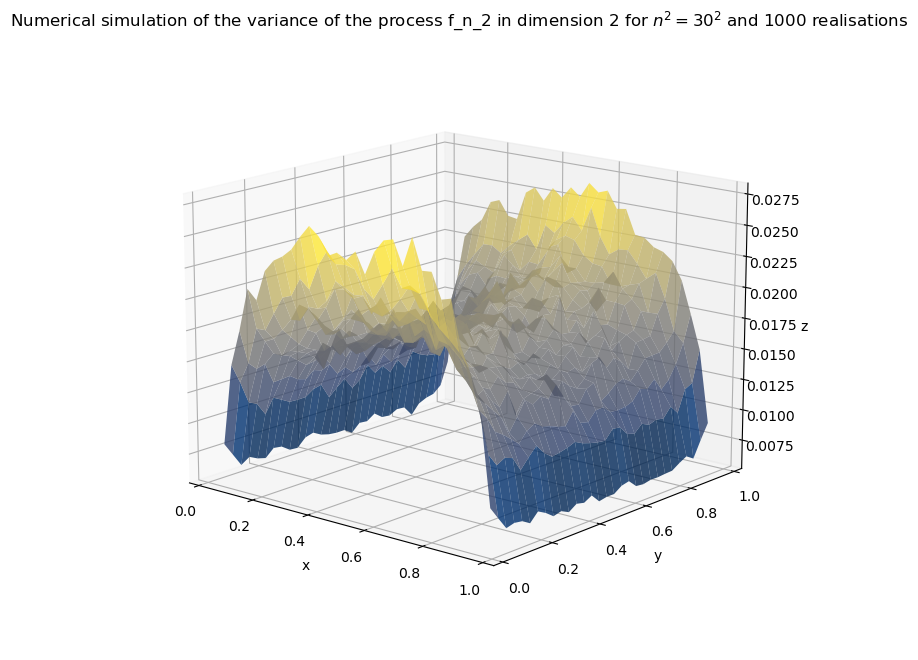

In [6]:
fig = plt.figure(figsize= (12,8))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.view_init(elev=15, azim=-50, roll=0)

# x and y axis

X_axis=Y_coord #need to invert to fit the definition of f
Y_axis=X_coord
Z_axis=np.var(B_array, axis=0)
 
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap='cividis', alpha=0.8)
 
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)

ax.set_title('Numerical simulation of the variance of the process f_n_2 in dimension 2 for $n^2=30^2$ and 1000 realisations')

extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('Figures/f_n_dimension_2_variance.png', bbox_inches=extent.expanded(1, 1.1))
 
plt.show()